In [1]:
# Import the necessary library
import numpy as np

# Build the Perceptron Model
class Perceptron:

	def __init__(self, num_inputs, learning_rate=0.01):
		# Initialize the weight and learning rate
		self.weights = np.random.rand(num_inputs + 1)
		self.learning_rate = learning_rate

	# Define the first linear layer
	def linear(self, inputs):
		Z = inputs @ self.weights[1:].T + + self.weights[0]
		return Z

	# Define the Heaviside Step function.
	def Heaviside_step_fn(self, z):
		if z >= 0:
			return 1
		else:
			return 0

	# Define the Prediction
	def predict(self, inputs):
		Z = self.linear(inputs)
		try:
			pred = []
			for z in Z:
				pred.append(self.Heaviside_step_fn(z))
		except:
			return self.Heaviside_step_fn(Z)
		return pred

	# Define the Loss function
	def loss(self, prediction, target):
		loss = (prediction-target)
		return loss

	#Define training
	def train(self, inputs, target):
		prediction = self.predict(inputs)
		error = self.loss(prediction, target)
		self.weights[1:] += self.learning_rate * error * inputs
		self.weights[0] += self.learning_rate * error

	# Fit the model
	def fit(self, X, y, num_epochs):
		for epoch in range(num_epochs):
			for inputs, target in zip(X, y):
				self.train(inputs, target)


Accuracy: 0.975


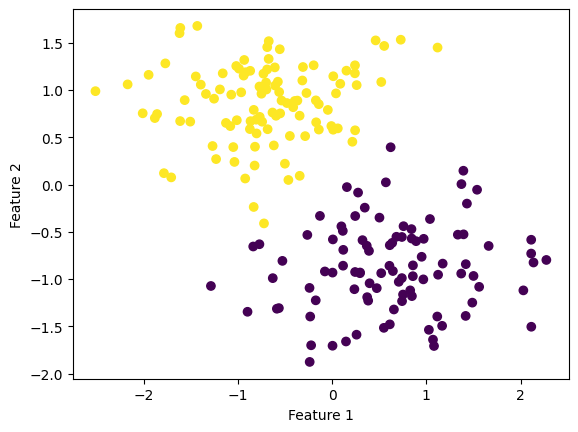

In [ ]:
# Import the necessary library
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate a linearly separable dataset with two classes
X, y = make_blobs(n_samples=1000,
				n_features=2,
				centers=2,
				cluster_std=3,
				random_state=23)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
													y,
													test_size=0.2,
													random_state=23,
													shuffle=True
												)

# Scale the input features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Set the random seed legacy
np.random.seed(23)

# Initialize the Perceptron with the appropriate number of inputs
perceptron = Perceptron(num_inputs=X_train.shape[1])

# Train the Perceptron on the training data
perceptron.fit(X_train, y_train, num_epochs=100)

# Prediction
pred = perceptron.predict(X_test)

# Test the accuracy of the trained Perceptron on the testing data
accuracy = np.mean(pred != y_test)
print("Accuracy:", accuracy)

# Plot the dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Epoch [1/10], weight:[[ 0.25440815 -0.63053024]], bias:[0.4763003] Loss: 103.0000
Epoch [2/10], weight:[[ 0.26117632 -0.6562369 ]], bias:[0.41230112] Loss: 64.0000
Epoch [3/10], weight:[[ 0.262651   -0.67187446]], bias:[0.3673017] Loss: 45.0000
Epoch [4/10], weight:[[ 0.26093012 -0.68198335]], bias:[0.33430213] Loss: 33.0000
Epoch [5/10], weight:[[ 0.25795096 -0.68903947]], bias:[0.30830246] Loss: 26.0000
Epoch [6/10], weight:[[ 0.25334218 -0.69491786]], bias:[0.28630275] Loss: 22.0000
Epoch [7/10], weight:[[ 0.2507608  -0.69876593]], bias:[0.267303] Loss: 19.0000
Epoch [8/10], weight:[[ 0.24817947 -0.702614  ]], bias:[0.2483032] Loss: 19.0000
Epoch [9/10], weight:[[ 0.24493918 -0.70632946]], bias:[0.23030317] Loss: 18.0000
Epoch [10/10], weight:[[ 0.24174543 -0.7090125 ]], bias:[0.21530314] Loss: 15.0000
Accuracy on Test Dataset: 0.9750000238418579


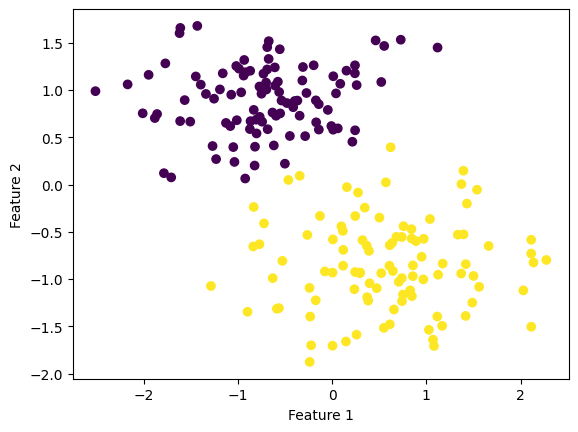

In [ ]:
# Import the necessary libraries
import torch
import torch.nn as nn
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate a linearly separable dataset with two classes
X, y = make_blobs(n_samples=1000,
				n_features=2,
				centers=2,
				cluster_std=3,
				random_state=23)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
													y,
													test_size=0.2,
													random_state=23,
													shuffle=True
												)

# Scale the input features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32, requires_grad=False)
X_test = torch.tensor(X_test, dtype=torch.float32, requires_grad=False)
y_train = torch.tensor(y_train, dtype=torch.float32, requires_grad=False)
y_test = torch.tensor(y_test, dtype=torch.float32, requires_grad=False)

# reshape the target tensor to match the predicted output tensor
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

torch.random.seed()

# Define the Perceptron model
class Perceptron(nn.Module):
	def __init__(self, num_inputs):
		super(Perceptron, self).__init__()
		self.linear = nn.Linear(num_inputs, 1)

	# Heaviside Step function
	def heaviside_step_fn(self,Z):
		Class = []
		for z in Z:
			if z >= 0:
				Class.append(1)
			else:
				Class.append(0)
		return torch.tensor(Class)

	def forward(self, x):
		Z = self.linear(x)
		return self.heaviside_step_fn(Z)


# Initialize the Perceptron with the appropriate number of inputs
perceptron = Perceptron(num_inputs=X_train.shape[1])

# loss function
def loss(y_pred,Y):
	cost = y_pred-Y
	return cost


# Learning Rate
learning_rate = 0.001

# Train the Perceptron on the training data
num_epochs = 10
for epoch in range(num_epochs):
	Losses = 0
	for Input, Class in zip(X_train, y_train):
		# Forward pass
		predicted_class = perceptron(Input)
		error = loss(predicted_class, Class)
		Losses += error
		# Perceptron Learning Rule

		# Model Parameter
		w = perceptron.linear.weight
		b = perceptron.linear.bias

		# Matually Update the model parameter
		w = w - learning_rate * error * Input
		b = b - learning_rate * error

		# assign the weight & bias parameter to the linear layer
		perceptron.linear.weight = nn.Parameter(w)
		perceptron.linear.bias = nn.Parameter(b)
	print('Epoch [{}/{}], weight:{}, bias:{} Loss: {:.4f}'.format(
		epoch+1,num_epochs,
		w.detach().numpy(),
		b.detach().numpy(),
		Losses.item()))

# Test the accuracy of the trained Perceptron on the testing data
pred = perceptron(X_test)

accuracy = (pred==y_test[:,0]).float().mean()
print("Accuracy on Test Dataset:", accuracy.item())

# Plot the dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
